#  Outlining Shapes with Contours

### Apply the contour detection code to outline and highlight shapes in simple object images.

### *Outlining and Highlighting Road Signs Images Using Contour Detection*

# Part 1: Import Libraries

In [169]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


# Part 2: Function to Detect and Outline Shapes

In [170]:
def detectAndOutlineShapes(img):
    contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 500:
            peri = cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
            objCor = len(approx)
            x, y, w, h = cv2.boundingRect(approx)

            # Detect triangles (3 vertices)
            if objCor == 3:
                cv2.drawContours(imgContour, [cnt], -1, (0, 255, 0), 4)
                cv2.putText(imgContour, "Triangle", (x, y - 10), cv2.FONT_HERSHEY_COMPLEX, 0.7, (255, 0, 0), 2)

            # Detect rectangles (4 vertices)
            elif objCor == 4:
                aspRatio = w / float(h)
                if 0.98 < aspRatio < 1.03:
                    cv2.drawContours(imgContour, [cnt], -1, (0, 0, 255), 4)
                    cv2.putText(imgContour, "Square", (x, y - 10), cv2.FONT_HERSHEY_COMPLEX, 0.7, (255, 0, 0), 2)
                else:
                    cv2.drawContours(imgContour, [cnt], -1, (255, 0, 0), 4)
                    cv2.putText(imgContour, "Rectangle", (x, y - 10), cv2.FONT_HERSHEY_COMPLEX, 0.7, (255, 0, 0), 2)

            # Detect circles (more than 4 vertices)
            elif objCor > 4:
                (x, y), radius = cv2.minEnclosingCircle(cnt)
                cv2.drawContours(imgContour, [cnt], -1, (0, 255, 255), 4)
                cv2.putText(imgContour, "Circle", (int(x) - 20, int(y) - 20), cv2.FONT_HERSHEY_COMPLEX, 0.7, (255, 0, 0), 2)



# Example 1

# Part 3: Read Image and Preprocess

In [171]:
path = 'Roadsign_Triangle.jpg'
img = cv2.imread(path)
imgContour = img.copy()

imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

imgBlur = cv2.GaussianBlur(imgGray, (7, 7), 1)

imgCanny = cv2.Canny(imgBlur, 50, 50)

# Part 4: Detect and Outline Shapes

In [172]:
detectAndOutlineShapes(imgCanny)

imgBlank = np.zeros_like(img)

imgStack = stackImages(0.8, ([img, imgGray, imgBlur],
                             [imgCanny, imgContour, imgBlank]))

# Part 5: Display the Outcome

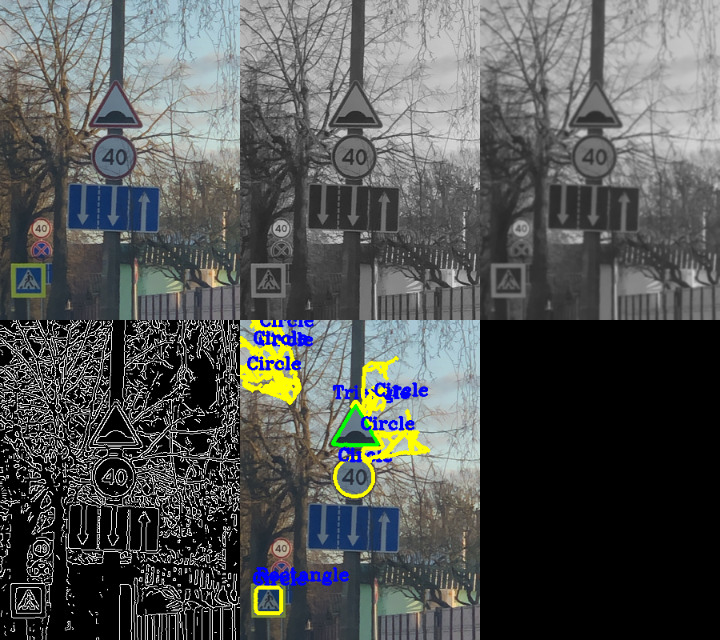

-1

In [173]:
cv2_imshow(imgStack)
cv2.waitKey(0)

# Example 2

In [174]:
path = 'Roadsign_Circle.jpg'
img = cv2.imread(path)
imgContour = img.copy()

imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

imgBlur = cv2.GaussianBlur(imgGray, (7, 7), 1)

imgCanny = cv2.Canny(imgBlur, 50, 50)

In [175]:
detectAndOutlineShapes(imgCanny)

imgBlank = np.zeros_like(img)

imgStack = stackImages(0.8, ([img, imgGray, imgBlur],
                             [imgCanny, imgContour, imgBlank]))

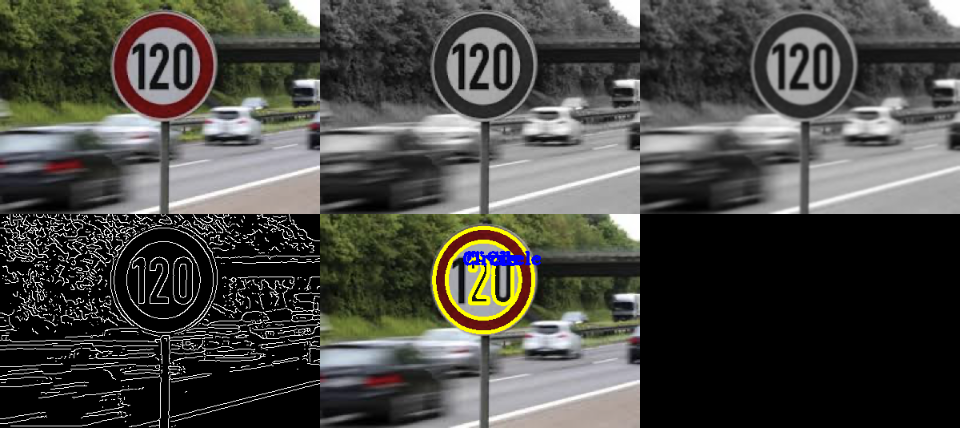

-1

In [176]:
cv2_imshow(imgStack)
cv2.waitKey(0)

In [177]:
path = 'Roadsign_Rectangle.jpg'
img = cv2.imread(path)
imgContour = img.copy()

imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

imgBlur = cv2.GaussianBlur(imgGray, (7, 7), 1)

imgCanny = cv2.Canny(imgBlur, 50, 50)

In [178]:
detectAndOutlineShapes(imgCanny)

imgBlank = np.zeros_like(img)

imgStack = stackImages(0.8, ([img, imgGray, imgBlur],
                             [imgCanny, imgContour, imgBlank]))

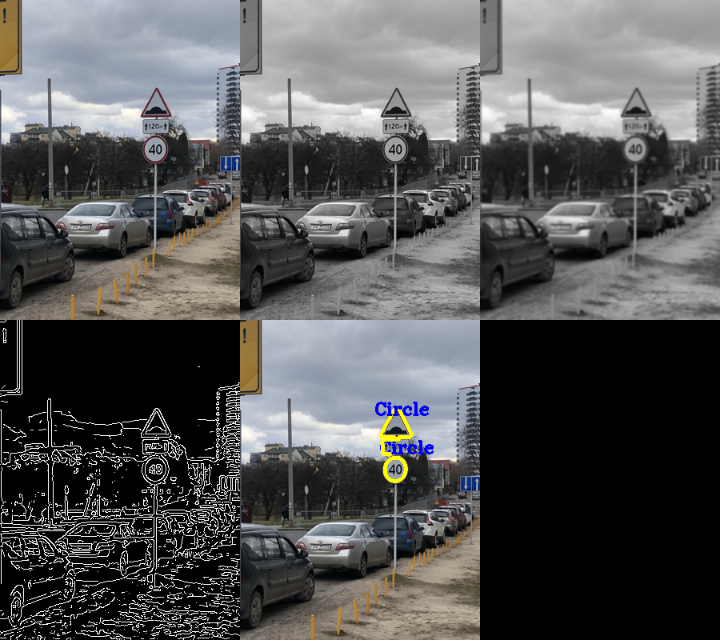

-1

In [179]:
cv2_imshow(imgStack)
cv2.waitKey(0)